# ボストンの住宅価格データセットの例題を試してみる #

## 1. ボストンの住宅価格データセットの例題って？  
scikit-learnにあるボストンの住宅価格データセットを使って住宅価格を予測する。
## 2. ボストンの住宅価格データセットってどんなデータ？  
とりあえず、説明(DESCR)をチェックする。

In [1]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## 3. 説明から判ったこと  
サンプル数は506。  
14個の属性情報が入っている。  
どうも論理的な問題（黒人の割合とかあるからかな？）があるので、そのうち削除される様子。
## 4. データをロードして参照してみる

In [2]:
import pandas as pd
display(boston_dataset.keys())
display(len(boston_dataset.data))
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
display(boston_df.head())
display(boston_df.tail())
boston_df.describe()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

506

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## 5. データ確認
データに正解(target)を付与し、ペアプロットしてみます

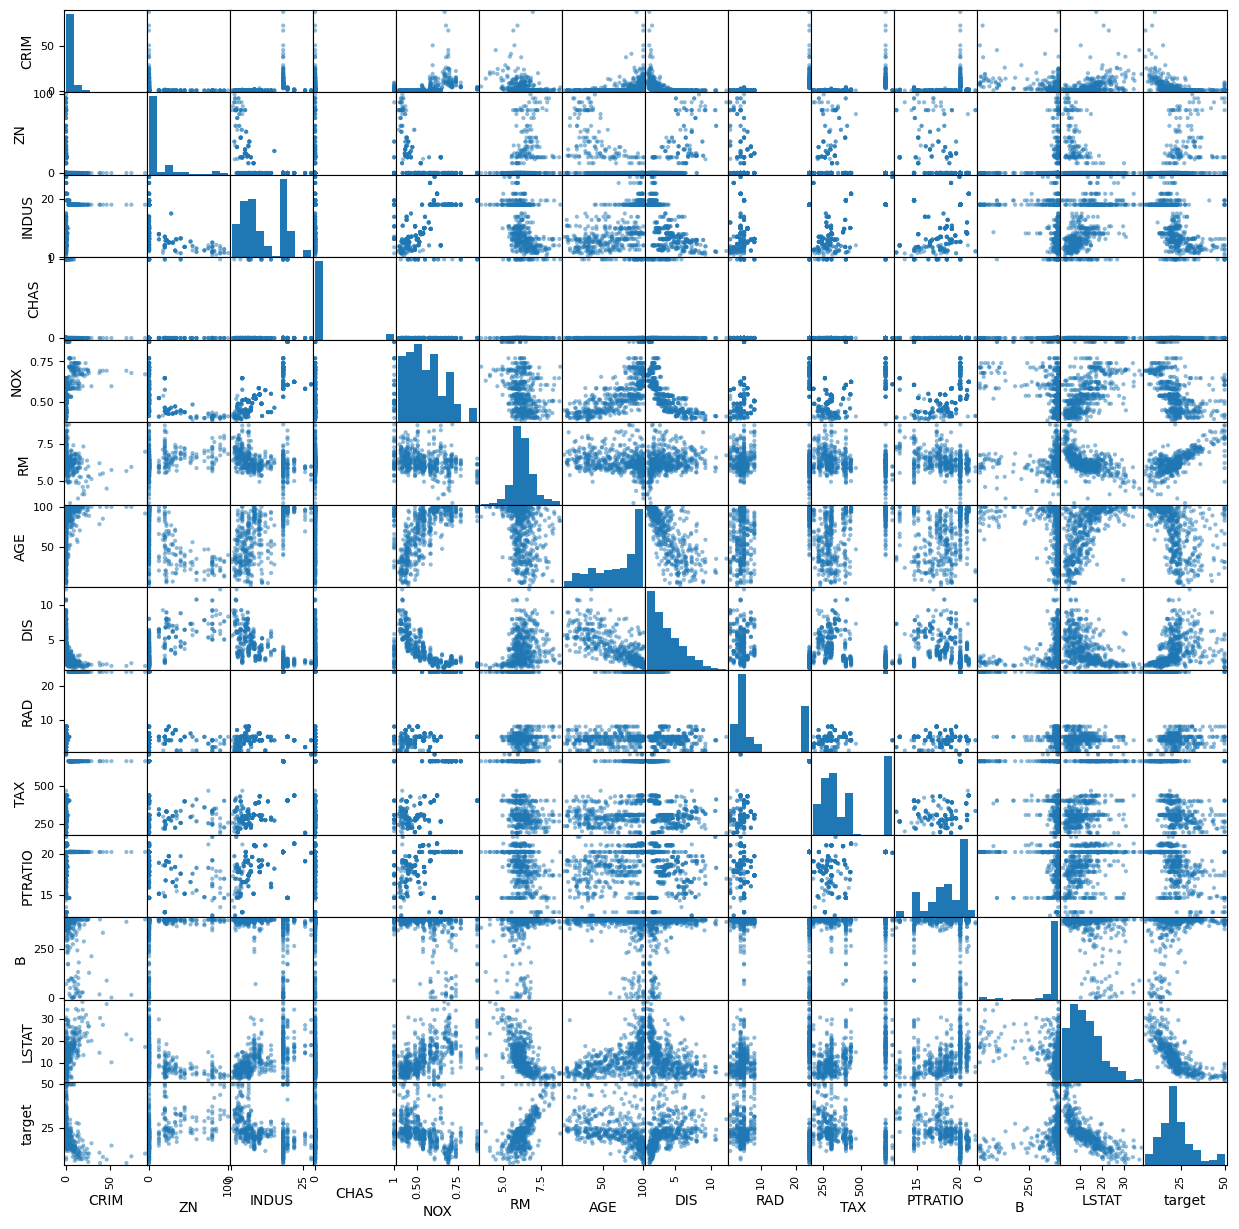

In [3]:
import matplotlib.pyplot as plt
boston_df["target"] = boston_dataset.target
fig = pd.plotting.scatter_matrix(boston_df, figsize=(15,15))
plt.show()

## 6. ペアプロットの結果  
CRIM(犯罪発生率)、ZN(25000平方フィート以上の住宅区間の割合)、RM(一戸あたりの平均部屋数)とは比例してそう。  
LSTAT(低所得者の割合)とは反比例してそう。  

## 7. データの分割
教師データとテストデータに分ける
分ける比率は8:2とする

In [4]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(boston_dataset.data, boston_dataset.target, test_size=0.2, random_state=0)

## 8. モデルの作成
線形回帰(LinearRegression)を使ってみる  

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

## 9.学習
とりあえず、学習させてみる

In [6]:
lr.fit(data_train, target_train)
predict = lr.predict(data_test)

## 10.結果
スコアを確認

In [7]:
display(lr.score(data_train, target_train))

0.7730135569264234

## 11.考察
何にも考えずに線形回帰で全データを入れた場合  
**<span style="color: red; ">77.3%</span>**となった。  
精度が低いのでもう少しどうにかならないか考えてみる。
影響ありそうなデータを確認

## 12. CRIM(犯罪発生率)

<AxesSubplot:xlabel='CRIM', ylabel='target'>

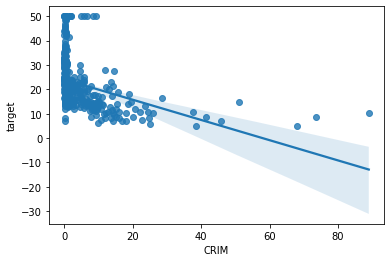

In [8]:
import seaborn as sns
%matplotlib inline
sns.regplot(x='CRIM',y='target',data = boston_df)

## 13. ZN(25000平方フィート以上の住宅区間の割合)

<AxesSubplot:xlabel='ZN', ylabel='target'>

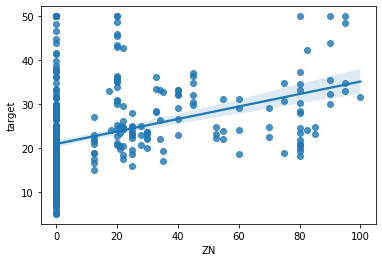

In [9]:
sns.regplot(x='ZN',y='target',data = boston_df)

## 14.RM(一戸あたりの平均部屋数)

<AxesSubplot:xlabel='RM', ylabel='target'>

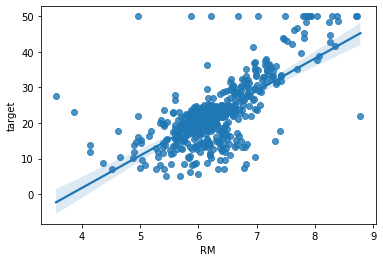

In [10]:
sns.regplot(x='RM',y='target',data = boston_df)

## 15.LSTAT(低所得者の割合)

<AxesSubplot:xlabel='LSTAT', ylabel='target'>

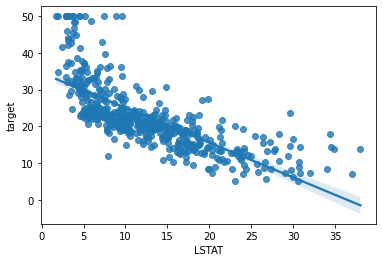

In [11]:
sns.regplot(x='LSTAT',y='target',data = boston_df)

## 16.関係がありそうな４つのデータだけで行ってみる

In [12]:
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df["target"] = boston_dataset.target
data = boston_df.loc[:,['CRIM','ZN','RM','LSTAT']].values
data_train, data_test, target_train, target_test = train_test_split(data, boston_dataset.target, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(data_train, target_train)
predict = lr.predict(data_test)
display(lr.score(data_train, target_train))

0.6770486440664234

## 17.結果
**<span style="color: red; ">67.7%</span>**となった。  
かえって減ってしまった。  
データは多い方がいいみたい。

## 18.標準化
標準化で変化があるか確認してみる。

In [13]:
from sklearn.preprocessing import StandardScaler
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df["target"] = boston_dataset.target
sc = StandardScaler()
std = sc.fit_transform(boston_df)
data_train, data_test, target_train, target_test = train_test_split(boston_dataset.data, boston_dataset.target, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(data_train, target_train)
predict = lr.predict(data_test)
display(lr.score(data_train, target_train))

0.7730135569264234

## 19.結果
標準化しても何も影響しなかった。

## 20.データ確認
14の図を見ると、価格50の所に変なデータがある。  
上限が50に丸められてる様子。  
試しに価格50のデータを抜いて確認してみる。

In [14]:
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df["target"] = boston_dataset.target
boston_df.drop(boston_df.loc[boston_df['target']==50].index,inplace=True)
#data = boston_df.loc[:,['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].values
#data_train, data_test, target_train, target_test = train_test_split(data, boston_df.target, test_size=0.2, random_state=0)
data_train, data_test, target_train, target_test = train_test_split(boston_df[boston_df.columns[boston_df.columns !='target']], boston_df.target, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(data_train, target_train)
predict = lr.predict(data_test)
display(lr.score(data_train, target_train))

0.7809951706641971

## 21.結果
**<span style="color: red; ">78.1%</span>**となった。  
少し改善した。  
やはり、異常データだったみたい。